#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

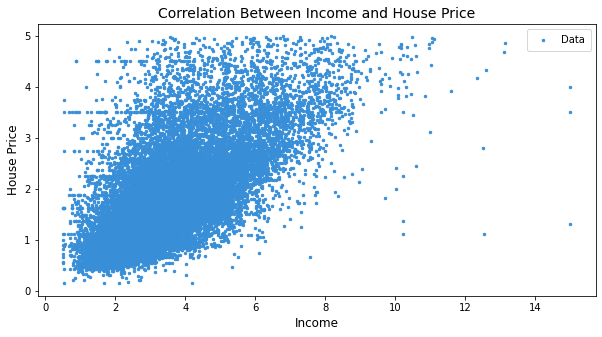

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  ################################################
  ####write your code here######################## 
  #################################################   
  error=[]    
  m =0.3
  b= 0.5
  for i in range(0,epochs):
      ind=np.random.randint(0,len(X),batch_size)
      x=np.take(X,ind)
      Y=np.take(y,ind)
      model= Y-(m*x+b)
      m =m- lr * (-2 * np.dot(x,model).sum() / len(X))
      b =b- lr * (-2 * model.sum() / len(X))
      error.append(mean_squared_error(y,m*X+b))
  
  mse=mean_squared_error(y,m*X+b)
  return m, b, mse ,error

In [0]:

m, b,  mse ,error= SGD(X, y, lr=1, epochs=1000, batch_size=10)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

0.3815324003460467
0.5091065453274722


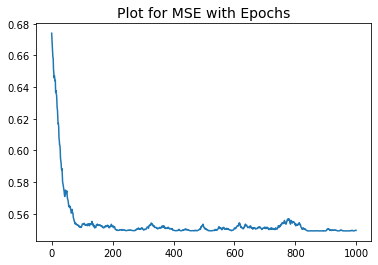

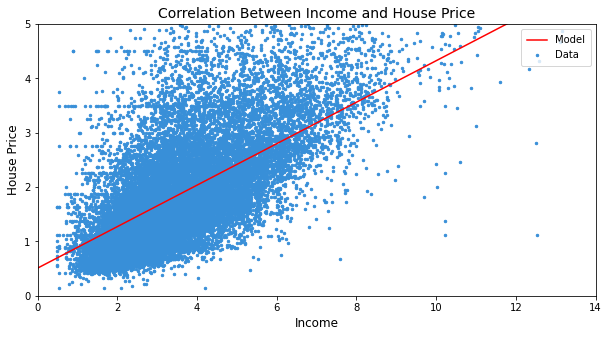

In [0]:
y_pred = m*X + b
ax=np.linspace(0,14,15)
print(m)
print(b)
ay= m*ax+b
################################################
###########write your code#####################
###############################################
plt.plot(error)
plt.title('Plot for MSE with Epochs', fontSize=14)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(ay,color='r',label='Model')
plt.ylim(0,5)
plt.xlim(0,14)
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



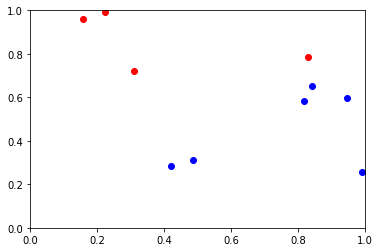

In [0]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epoch, l_rate):
    ###################################
    ### Write your code here###########
    ###################################
    x = np.insert(x,0,1,axis=1)
    n_samples,n_feature=x.shape
    w= np.zeros(n_feature) 
    for e in range(epoch):
        for i,j in enumerate(x):
            condition=y[i]*(np.dot(x[i],w))>=1
            if condition:
                w=w-l_rate*(2*(1/epoch)*w)
            else:
                w=w - l_rate*(2*(1/epoch)*w - x[i]*y[i])
     
    
    return w



---


**Run SVM Classifier**


---



In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



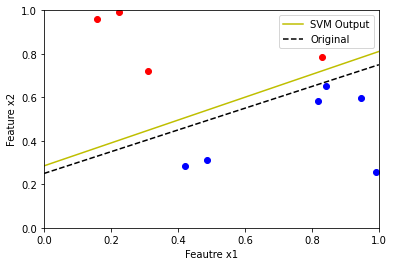

In [0]:
###################################
### Write your code here###########
###################################
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(0,1)
    plt.ylim(0,1)
    
x1 = np.linspace(0, 1, num=400)
z = 0.5*x1 + 0.25
x2 = -(((w[1])/w[2])*x1+w[0]/w[2])
plt.plot(x1, x2,'y',label='SVM Output')
plt.plot(x1,z,'--k',label='Original')
plt.xlabel('Feautre x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()